In [2]:
!pip install matplotlib

    100% |████████████████████████████████| 13.0MB 1.9MB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/11/fa/0160cd525c62d7abd076a070ff02b2b94de589f1a9789774f17d7c54058e/pyparsing-2.4.2-py2.py3-none-any.whl
    100% |████████████████████████████████| 92kB 14.6MB/s ta 0:00:01
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [5]:
# define the model options and run

options = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolo.weights',
    'threshold': 0.3,
    'gpu': 1.0
}

tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.03656125068664551s
Model has a coco model name, loading coco labels.

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------



       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)

 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  | 

In [13]:
import cv2

In [17]:
# read the color image and covert to RGB

img = cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# use YOLO to predict the image
result = tfnet.return_predict(img)

result

[{'bottomright': {'x': 551, 'y': 463},
  'confidence': 0.8053032,
  'label': 'bicycle',
  'topleft': {'x': 84, 'y': 115}},
 {'bottomright': {'x': 698, 'y': 168},
  'confidence': 0.8214264,
  'label': 'truck',
  'topleft': {'x': 461, 'y': 82}},
 {'bottomright': {'x': 326, 'y': 535},
  'confidence': 0.8229169,
  'label': 'dog',
  'topleft': {'x': 130, 'y': 215}}]

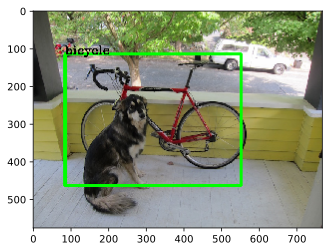

In [18]:
# pull out some info from the results

tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
label = result[0]['label']


# add the box and label and display it
img = cv2.rectangle(img, tl, br, (0, 255, 0), 7)
img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
plt.imshow(img)
plt.show()

In [ ]:
# WOW!